<a href="https://colab.research.google.com/github/bryonbaker/SIT720/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT720 - Assignment 1

Bryon Baker
Student number: 85031775

# Import required modules and libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function Declarations

## QUESTION 1
* Load the data from supplied data file. 
* Select the first 500 observations/ samples from the dataset. 
* Print the data dimension.


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass1/hypothyroid.csv'
fullht_df = pd.read_csv(url)
fullht_df.head(n=500)

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,f,f,f,f,1.3,2.5,125,109,P
1,23,F,f,f,f,f,4.1,2,102,?,P
2,46,M,f,f,f,f,0.98,?,109,120,P
3,70,F,t,f,f,f,0.16,1.9,175,?,P
4,70,F,f,f,f,f,0.72,1.2,61,70,P
...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,f,f,f,f,?,?,93,102,P
496,45,F,f,f,f,f,0.02,1.4,144,?,P
497,82,M,f,f,f,f,0.15,1.4,133,134,P
498,55,F,f,f,f,f,11,1.5,144,116,N


In [4]:
# Get the first 500 rows from the dataset and use that for the rest of the assignment.
ht_df = fullht_df.head(n=500)

# Display the dataset's dimension
initialShape = ht_df.shape
print(f"Working dataset dimension is: {initialShape}\n")

Working dataset dimension is: (500, 11)



## QUESTION 2
* Continue from question 1. 
* Display the number of rows and their indices that have missing data in one or more cells. 
* Now, replace the missing data by the lowest value of the corresponding feature if it is a continuous variable. In case of categorical variable, remove the sample. 
* Print the median values of all features before and after replacing missing data.

In [5]:
# Find the number of rows that have missing data
ht_df = ht_df.replace('?', np.NaN)              # Replace ? with NaN
numMissing = ht_df.isna().any(axis=1).sum()
print(f"The number of rows with missing values is {numMissing}")

# Define the features that are subject to replacing with the lowest value in the column.
# This series will ne used to define the features that will be updated if they are missing.
continuousFeatures = pd.Series(["age", "TSH","T3","TT4","FTI"], copy = False)

# All features are currently text. Change the data types of the continuous variables to numeric
# so we can perform calculations with them.
ht_df[continuousFeatures] = ht_df[continuousFeatures].apply(pd.to_numeric)

# Calculate the Median prior to replacing missing values
initialMedian = ht_df[continuousFeatures].median(skipna=True)
print("\n=============================")
print("Median Pre-Data Modification:")
print("=============================")
print(f"The Median of each column is:\n{initialMedian}")

# Find the minimum value for each continuous variable
minValues = ht_df.min(axis=0)
print("\n======================================")
print("Updating missing continuous variables:")
print("======================================")
for index, value in continuousFeatures.items():
    print(f"Min value for {value} is {minValues[value]}")
    ht_df[value] = ht_df[value].fillna(minValues[value])

# Calculate the Median value of all continuous features.
# Using the list of continuous features, replace any missing (NaN) values with the lowest value in the column.
# Replace the NaN's of the numeric columns with the mean
ht_df["TSH"] = ht_df["TSH"].fillna(continuousFeatures[1])
# Calculate the new Median value of all continuous features.
# Display the before/after Median values

# Calculate the Median prior to replacing missing values
postMedian = ht_df[continuousFeatures].median(skipna=True)
print("\n===============================")
print("Median Post-Data Modification:")
print("==============================")
print(f"The Median of each column is:\n{postMedian}")

# Now all the continuous variables have had NaN replaced, drop any rows with categorical values of NaN
numMissing = ht_df.isna().any(axis=1).sum()# Recalculate the number of rows left with missing values for assert later.
ht_df = ht_df.dropna()


# Display the dataset's new dimension
print(f"Working dataset dimension is: {ht_df.shape}\n")
print(f"Initial shape: {initialShape[0]} New shape: {ht_df.shape[0]} Number of rows dropped: {numMissing}")

# Check that the new shape is correct based on the number of missing non-continuous values
assert initialShape[0] == ht_df.shape[0]+numMissing

The number of rows with missing values is 144

Median Pre-Data Modification:
The Median of each column is:
age     55.0
TSH      1.4
T3       1.9
TT4    103.0
FTI    108.0
dtype: float64

Updating missing continuous variables:
Min value for age is 1
Min value for TSH is 0.005
Min value for T3 is 0.05
Min value for TT4 is 11.0
Min value for FTI is 8.9

Median Post-Data Modification:
The Median of each column is:
age     55.00
TSH      1.15
T3       1.70
TT4    102.00
FTI    105.00
dtype: float64
Working dataset dimension is: (478, 11)

Initial shape: 500 New shape: 478 Number of rows dropped: 22


In [6]:
# Display the new data set for informational purposes
ht_df.head(n=500)

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,f,f,f,f,1.300,2.50,125.0,109.0,P
1,23,F,f,f,f,f,4.100,2.00,102.0,8.9,P
2,46,M,f,f,f,f,0.980,0.05,109.0,120.0,P
3,70,F,t,f,f,f,0.160,1.90,175.0,8.9,P
4,70,F,f,f,f,f,0.720,1.20,61.0,70.0,P
...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,f,f,f,f,0.005,0.05,93.0,102.0,P
496,45,F,f,f,f,f,0.020,1.40,144.0,8.9,P
497,82,M,f,f,f,f,0.150,1.40,133.0,134.0,P
498,55,F,f,f,f,f,11.000,1.50,144.0,116.0,N


## QUESTION 3

* Continue from question 2.
* Is there any change in data type? If yes, convert them back to appropriate data types. 
* Print all variables with corresponding data type.

In [7]:
# Change the t/f features to proper boolean values by creating a new column mapped to the original value

boolColumns = pd.Series(["on thyroxine", "pregnant", "I131 treatment", "query hyperthyroid"], copy = False)    # The columns to change types
boolMap = {'t' : True, 'f': False }    # How to map the values
cols = ht_df.columns.tolist()     # Get the order of columns so we can preserve the table structure after we change all the types with row swaps.

for index, value in boolColumns.items():
    oldName = value    # Save the old name for renaming back later
    newName = "new_" + value    # Create a temporary column name
    ht_df[newName] = ht_df[oldName].map(boolMap)    # Adds a new column with proper boolean values
    ht_df = ht_df.drop([oldName], axis=1)    # Drop the old column before renaming the new column to the name just dropped
    ht_df = ht_df.rename(columns={newName : oldName})

ht_df = ht_df[cols]    # Reorder the columns back to what they were before we started.

In [8]:
print("Updated table structure")
print("=======================")
ht_df.head()

Updated table structure


,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,False,False,False,False,1.30,2.50,125.0,109.0,P
1,23,F,False,False,False,False,4.10,2.00,102.0,8.9,P
2,46,M,False,False,False,False,0.98,0.05,109.0,120.0,P
3,70,F,True,False,False,False,0.16,1.90,175.0,8.9,P
4,70,F,False,False,False,False,0.72,1.20,61.0,70.0,P


In [9]:
print("DataFrame variables and corresponding data types:")
print("=================================================")
print(ht_df.dtypes)

DataFrame variables and corresponding data types:
age                     int64
sex                    object
on thyroxine             bool
pregnant                 bool
I131 treatment           bool
query hyperthyroid       bool
TSH                   float64
T3                    float64
TT4                   float64
FTI                   float64
binaryClass            object
dtype: object


## QUESTION 4
* Continue from question 3. 
* Print the total numbers and ratio of male and female patients who are receiving I131 treatment.

In [10]:
male_i131 = ht_df[(ht_df["I131 treatment"] == True) & (ht_df["sex"] == "M")]
female_i131 = ht_df[(ht_df["I131 treatment"] == True) & (ht_df["sex"] == "F")]
total_i131 = ht_df[ht_df["I131 treatment"] == True]
numMales = ht_df[ht_df["sex"] == "M"].shape[0]
numFemales = ht_df[ht_df["sex"] == "F"].shape[0]

numMalesWithI131 = male_i131.shape[0]
numFemalesWithI131 = female_i131.shape[0]
totalWithI131 = total_i131.shape[0]

print(f"Number of Males receiving I131 treatment is: {numMalesWithI131}")
print(f"Number of Females receiving I131 treatment is: {numFemalesWithI131}")
print(f"Total number of people receiving I131 treatment is: {totalWithI131}")
print(f"Ratio of Males receiving/not receiving I131 Treatment is: {numMalesWithI131/numMales}")
print(f"Ratio of Females receiving/not receiving I131 Treatment is: {numFemalesWithI131/numFemales}")

Number of Males receiving I131 treatment is: 2
Number of Females receiving I131 treatment is: 0
Total number of people receiving I131 treatment is: 2
Ratio of Males receiving/not receiving I131 Treatment is: 0.011976047904191617
Ratio of Females receiving/not receiving I131 Treatment is: 0.0


## QUESTION 5
* Continue from question 3. 
* Print the average TSH and T3 with the patient with Hypothyroid problem. 
* Please report the pattern found in the result, if any.

In [11]:
# Looking for records with binaryClass == P. Calculate the average for the TSH and T3

averages = ht_df[ht_df["binaryClass"] == "P"][["TSH","T3"]].mean()
print("TSH/T3 Breakdown of Patients at Risk of Hypothyroid Disease:")
print("\tAverage TSH: {:3f} mU/L".format(averages['TSH']))
print("\tAverage T3: {:3f} ng/dl".format(averages['T3']))

TSH/T3 Breakdown of Patients at Risk of Hypothyroid Disease:
	Average TSH: 1.582991 mU/L
	Average T3: 1.585388 ng/dl


### ANALYSIS
When considered in isolation, these results indicate that there is a relationship between the average TSH and T3 values. (TSH: 1.582 and T3: 1.585)
However, this alone should not be used to draw any conclusions because, as shown below, the ranges (0..27.0 vs. 0..5.5) and standard deviations (2.86 vs. 1.08) are very different, indicating that the similar values are coincidence.

In [12]:
anal = ht_df[ht_df["binaryClass"] == "P"][["TSH","T3"]]
print(f"TSH Breakdown:\n{anal['TSH'].describe()}\n")
print(f"T3 Breakdown:\n{anal['T3'].describe()}")

TSH Breakdown:
count    438.000000
mean       1.582991
std        2.864859
min        0.005000
25%        0.150000
50%        1.000000
75%        1.975000
max       27.000000
Name: TSH, dtype: float64

T3 Breakdown:
count    438.000000
mean       1.585388
std        1.075153
min        0.050000
25%        0.900000
50%        1.700000
75%        2.300000
max        5.500000
Name: T3, dtype: float64


## QUESTION 6
* Continue from question 3. 
* Print the average TSH and T3 with the patient with Hyperthyroid problem. 
* Please report the pattern found in the result, if any.

In [13]:
means = ht_df[ht_df["query hyperthyroid"] == True][["TSH","T3"]].mean()
tshMean = means["TSH"] if not pd.isna(means["TSH"]) else 0
t3Mean = means["T3"] if not pd.isna(means["T3"]) else 0

print("TSH/T3 Breakdown of Patients at Risk of Hyperthyroid Disease:")
print("\tAverage TSH: {:.3f} mU/L".format(tshMean))
print("\tAverage T3: {:.3f} ng/dl".format(t3Mean))

TSH/T3 Breakdown of Patients at Risk of Hyperthyroid Disease:
	Average TSH: 3.583 mU/L
	Average T3: 2.010 ng/dl


## ANALYSIS
...

## QUESTION 7
* Continue from question 3.
* Print the percentage of pregnant patients at risk of Hypothyroid disease.

In [14]:
#numPreg = ht_df[(ht_df["binaryClass"] == "P") & (ht_df["pregnant"] == True)].shape[0]
preg_df = ht_df[ht_df["pregnant"] == True]
pregHypo_df = preg_df[preg_df["binaryClass"] == "P"]
print("The percentage of pregnant patients at risk of Hypothyroid disease is {:.2f}%".format((pregHypo_df.shape[0]/preg_df.shape[0])*100))

The percentage of pregnant patients at risk of Hypothyroid disease is 100.00%


## QUESTION 8
* Continue from question 3. 
* Calculate and print the average TSH and TT4 for pregnant patient at risk of Hypothyroid disease.

In [15]:
means = pregHypo_df[["TSH","TT4"]].mean()
tshMean = means["TSH"] if not pd.isna(means["TSH"]) else 0
tt4Mean = means["TT4"] if not pd.isna(means["TT4"]) else 0

print("TSH/TT4 Breakdown of Pregnant Patients at Risk of Hypothyroid Disease:")
print("\tAverage TSH: {:.3f} mU/L".format(tshMean))
print("\tAverage TT4: {:.3f} nmol/L".format(tt4Mean))

TSH/TT4 Breakdown of Pregnant Patients at Risk of Hypothyroid Disease:
	Average TSH: 0.478 mU/L
	Average TT4: 130.375 nmol/L


## QUESTION 9
* Continue from question 3.
* Calculate and print the average FTI and TT4 for pregnant patient who are receiving I131 treatment and are at risk of Hyperthyroid disease.

In [16]:
#pregHyperI131_df = preg_df[(preg_df["query hyperthyroid"] == True) & (preg_df["I131 treatment"] == True)]
pregHyperI131_df = ht_df[(ht_df["pregnant"] == True) & (ht_df["query hyperthyroid"] == True) & (ht_df["I131 treatment"] == True)]
means = pregHyperI131_df[["FTI","TT4"]].mean()
ftiMean = means["FTI"] if not pd.isna(means["FTI"]) else 0
tt4Mean = means["TT4"] if not pd.isna(means["TT4"]) else 0
print("FTI/TT4 Breakdown of Pregnant Patients at Risk of Hypothyroid Disease:")
print("\tAverage FTI: {:.3f} ug/dL".format(ftiMean))
print("\tAverage TT4: {:.3f} nmol/L".format(tt4Mean))

FTI/TT4 Breakdown of Pregnant Patients at Risk of Hypothyroid Disease:
	Average FTI: 0.000 ug/dL
	Average TT4: 0.000 nmol/L


## QUESTION 10
* Continue from question 3.
* Create and print a dataframe of the FTI, T3, and TSH levels for diferent age groups (based on 10 years intervals)

In [17]:
# Find min age and max age
# loop through age range in increments of 10: (0->9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99)
# Query the main data frame

# Add an age-range column
# set the age-range value based on a query of (age <= minAge && age < maxAge)



In [18]:
# Calculate the age range
min = ht_df["age"].min()
min = min - min%10        # Round the age down to the nearest 10
max = ht_df["age"].max()
if max % 10 == 0:
    max += 10             # If the max age is divisible by ten create an extra age bracket as we are using 0-9, 10-19, ... 

# Create an age map of specific age to bracket
ageMap = {}
bracket = 0
for age in range(min, max):
    ageMap[age] = "%d-%d" % (bracket, bracket+9)
    if (age+1) % 10 == 0:
        bracket += 10
    
# Add a new column with the age bracket
bracket_df = ht_df
bracket_df["age bracket"] = bracket_df["age"].map(ageMap)
bracket_df = bracket_df.sort_values(by=["age bracket"])
q10_df = bracket_df[{"age bracket", "FTI", "T3", "TSH"}]
print(q10_df.to_string())

       FTI age bracket      TSH    T3
411  133.0         0-9   15.000  0.05
138  110.0         0-9    0.940  2.00
228  113.0         0-9    1.600  1.80
375  143.0       10-19   25.000  1.10
424  115.0       10-19    1.100  0.05
279   81.0       10-19    2.900  4.00
374   98.0       10-19   12.000  2.20
137  101.0       10-19    0.005  0.05
265  100.0       10-19    2.700  2.80
260    8.9       10-19    9.000  2.20
107   85.0       10-19    0.005  2.40
150    8.9       10-19    0.005  0.05
331   81.0       10-19    1.000  1.40
161  130.0       10-19    0.100  4.20
155  154.0       10-19    1.100  0.05
5    141.0       10-19    0.030  0.05
240   71.0       10-19    0.450  3.20
177   86.0       10-19    0.700  1.80
230  100.0       10-19    1.800  2.00
422   68.0       10-19   16.000  1.30
92     8.9       20-29    0.005  0.05
340  140.0       20-29    0.250  1.80
345  120.0       20-29    1.800  2.30
120   83.0       20-29    0.020  3.40
363   97.0       20-29    0.500  1.70
95    84.0  

## Question 11
* Continue from question 3. 
* Find the average T3 and T4 level of across gender for each age group (based on 10 years interval). 
* Please explain the results.


In [19]:
# Calculate the age range
min = ht_df["age"].min()
min = min - min%10        # Round the age down to the nearest 10
max = ht_df["age"].max()
if max % 10 == 0:
    max += 10             # If the max age is divisible by ten create an extra age bracket as we are using 0-9, 10-19, ... 
    
print("=====================================================")
print("Average T3 & TT4 levels across gender by age bracket:")
print("=====================================================")
for age in range(min, max, 10):
    bracket = "%d-%d" % (age,age+9)
    print(f"Age Bracket: {bracket}")
    b = bracket_df[bracket_df["age bracket"] == bracket]
    averages = b[["T3", "TT4"]].mean()
    print("Average T3: {:.3f}".format(averages["T3"]))
    print("Average TT4: {:.3f}\n".format(averages["TT4"]))

Average T3 & TT4 levels across gender by age bracket:
Age Bracket: 0-9
Average T3: 1.283
Average TT4: 116.333

Age Bracket: 10-19
Average T3: 1.697
Average TT4: 106.000

Age Bracket: 20-29
Average T3: 1.719
Average TT4: 106.931

Age Bracket: 30-39
Average T3: 1.809
Average TT4: 109.475

Age Bracket: 40-49
Average T3: 1.441
Average TT4: 98.734

Age Bracket: 50-59
Average T3: 1.576
Average TT4: 99.842

Age Bracket: 60-69
Average T3: 1.369
Average TT4: 96.728

Age Bracket: 70-79
Average T3: 1.430
Average TT4: 99.410

Age Bracket: 80-89
Average T3: 1.535
Average TT4: 104.941

Age Bracket: 90-99
Average T3: 1.900
Average TT4: 203.000



### Analysis


## Question 12
* Continue from question 3. 
* Draw two scatter plots of FTI level, one against T4 and another against TSH rate. 
* Draw them in two subplots of the same plot.

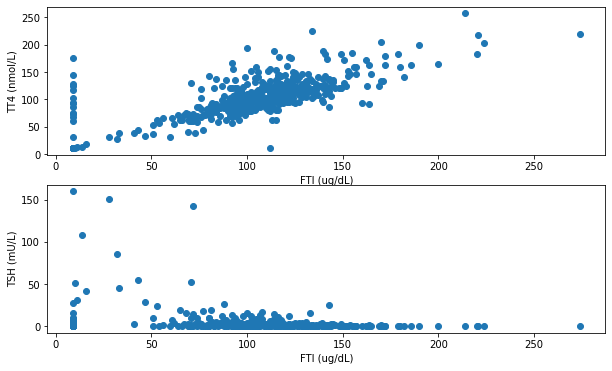

In [24]:
fig, ax = plt.subplots(2, figsize=(10, 6))

ax[0].scatter(x = ht_df['FTI'], y = ht_df['TT4'])
ax[0].set_xlabel("FTI (ug/dL)")
ax[0].set_ylabel("TT4 (nmol/L)")

ax[1].scatter(x = ht_df['FTI'], y = ht_df['TSH'])
ax[1].set_xlabel("FTI (ug/dL)")
ax[1].set_ylabel("TSH (mU/L)")

plt.show()

## Question 13
* Continue from question 3.
* Visualize the number of pregnant for each Hyper and Hypo disease group using bar plot. 
* Explain the graph base on your observation.

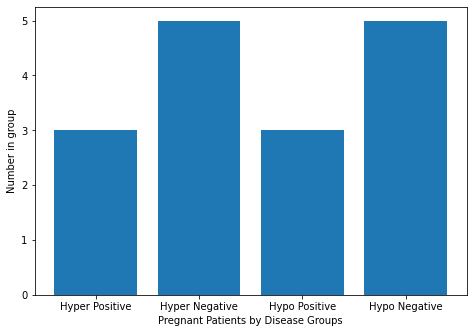

In [46]:
# Collect the data for plotting. h1 = Hyperthyroid, H2 = Hypothyroid
h1p = preg_df[preg_df["query hyperthyroid"] == True]
h1n = preg_df[preg_df["query hyperthyroid"] == False]
h2p = preg_df[preg_df["query hyperthyroid"] == True]
h2n = preg_df[preg_df["query hyperthyroid"] == False]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Pregnant Patients by Disease Groups")
ax.set_ylabel("Number in group")

diseaseGroup = ['Hyper Positive', 'Hyper Negative', 'Hypo Positive', 'Hypo Negative']
totals = [h1p.shape[0],h1n.shape[0],h2p.shape[0],h2n.shape[0]]
ax.bar(diseaseGroup,totals)
plt.show()